# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.716062e+01     1.658042e+01
 * time: 0.0015020370483398438
     1     3.448609e+01     8.557671e+00
 * time: 0.006244182586669922
     2     3.399624e+01     1.588932e+01
 * time: 0.01139211654663086
     3     3.026565e+01     1.809450e+01
 * time: 0.016476154327392578
     4     2.248659e+01     3.151326e+00
 * time: 0.02226114273071289
     5     1.976461e+01     2.470598e+00
 * time: 0.02722907066345215
     6     1.924228e+01     2.103633e+00
 * time: 0.031400203704833984
     7     1.871447e+01     1.543830e+00
 * time: 0.035755157470703125
     8     1.836152e+01     1.619957e+00
 * time: 0.039901018142700195
     9     1.796176e+01     1.813964e+00
 * time: 0.04404020309448242
    10     1.778722e+01     8.818455e-01
 * time: 0.04807710647583008
    11     1.764767e+01     8.176229e-01
 * time: 0.052152156829833984
    12     1.757793e+01     1.021742e+00
 * time: 0.055486202239990234
    13     1.756556e+01     1.165243e+00

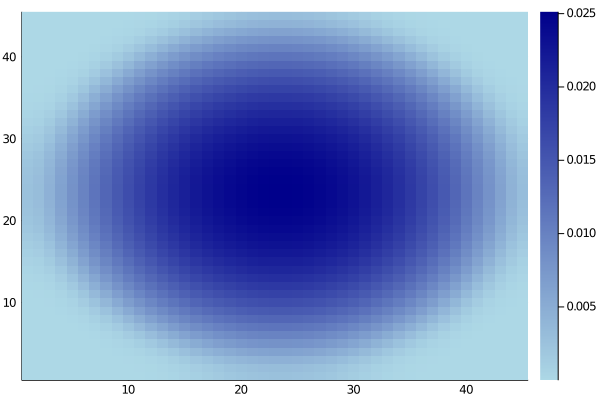

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)